In [1]:
!pip install tensorflow==2.0.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 79kB/s 
     |████████████████████████████████| 450kB 46.6MB/s 
     |████████████████████████████████| 3.8MB 54.3MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.0.1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2020-03-19 11:09:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-03-19 11:09:25 (52.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

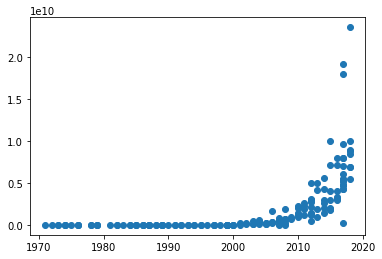

In [7]:
plt.scatter(X, Y)

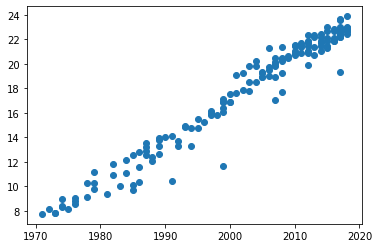

In [8]:
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
X = X-X.mean()

In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])


Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/sample - loss: 453.9654
Epoch 2/200
162/162 [==============================] - 0s 82us/sample - loss: 326.1579
Epoch 3/200
162/162 [==============================] - 0s 72us/sample - loss: 256.4835
Epoch 4/200
162/162 [==============================] - 0s 70us/sample - loss: 207.2582
Epoch 5/200
162/162 [==============================] - 0s 76us/sample - loss: 172.4703
Epoch 6/200
162/162 [==============================] - 0s 75us/sample - loss: 162.2432
Epoch 7/200
162/162 [==============================] - 0s 78us/sample - loss: 105.2086
Epoch 8/200
162/162 [==============================] - 0s 74us/sample - loss: 84.3582
Epoch 9/200
162/162 [==============================] - 0s 79us/sample - loss: 47.9311
Epoch 10/200
162/162 [==============================] - 0s 69us/sample - loss: 46.7468
Epoch 11/200
162/162 [==============================] - 0s 65us/sample - loss: 36.4393
Epoch 12/200
162/162 [===

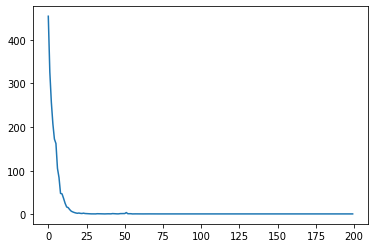

In [12]:
plt.plot(r.history['loss'], label = 'loss')


In [13]:
print(model.layers)
print(model.layers[0].get_weights())


[array([[0.33444744]], dtype=float32), array([17.771519], dtype=float32)]


In [0]:
a = model.layers[0].get_weights()[0][0,0]

In [15]:
print("Time to double:", np.log(2)/a)


Time to double: 2.0725145133019804


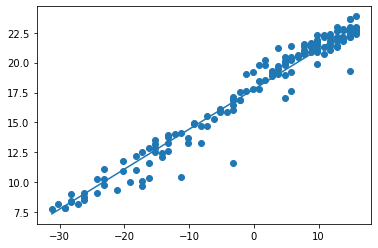

In [18]:
yhat= model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, yhat)


In [19]:
w, b = model.layers[0].get_weights()
X = X.reshape(-1,1)
yhat2 = (X.dot(w)+b).flatten()
np.allclose(yhat, yhat2)


True